# Задача 1.1
Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:

*   Нормальное
*   Лапласа
*   Стьюдента
*   Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)



In [ ]:
import numpy as np
import scipy.stats as st

np.random.seed(42)

# фиксируем количество элементов выборки
n = 100

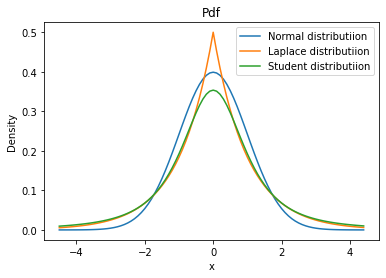

In [ ]:
#Распределения: стандартное нормальное, лапласа и стьюдента(df=2)
import matplotlib.pyplot as plt

x = np.arange(-4.5,4.5,0.1)
plt.plot(x, st.norm(0,1).pdf(x), label='Normal distributiion')
plt.plot(x, st.laplace.pdf(x), label='Laplace distributiion')
plt.plot(x, st.t(df=2).pdf(x), label='Student distributiion')

plt.xlabel('x')
plt.ylabel('Density')
plt.legend(loc='best')
plt.title('Pdf')
plt.show()

In [ ]:
#словарь с данными 
y = {'norm':[0,0,0],'lapl':[0,0,0],'stud':[0,0,0],'less_2':[0,0,0]}

#количество генераций случайных выборок = 100
for _ in range(100):
  x_norm = np.random.normal(size=n)
  x_lapl = np.random.laplace(size=n)
  x_stud = np.random.standard_t(df=2,size=n)
  x_less_2 = x_norm[abs(x_norm) <= 2]

  x = [x_norm,x_lapl,x_stud,x_less_2]

  #для каждой выборки проводим три теста:

  for i,x_type in enumerate(y): 
    #Лиллиефорс:
    if st.kstest(x[i],'norm')[1] <= 0.05: 
      y[x_type][0]+=1
    #Харке-Бера:
    if st.jarque_bera(x[i])[1] <= 0.05:
      y[x_type][1]+=1
    #Шапиро-Уилка:
    if st.shapiro(x[i])[1] <= 0.05:
      y[x_type][2]+=1
  
print(y)
# {'norm': [3, 7, 3], 'lapl': [7, 77, 82], 'stud': [24, 100, 100], 'less_2': [4, 0, 10]}

{'norm': [3, 7, 3], 'lapl': [7, 77, 82], 'stud': [24, 100, 100], 'less_2': [4, 0, 10]}


#Консервативность
Консервативность оцениваем исходя из поведения критериев на нормальной и усеченной выборке. Т.е. ошибка первого рода должна быть меньше 0.05 

При первом вычислении только критерий Лиллиефорса дает ошибку 0.03 и 0.04, тогда как остальные критерии оказываются антиконсервативными.

In [ ]:
# Ошибка первого рода
print("Вероятность отвергнуть нулевую гипотезу в случае, если она верна (то есть распределение выборки заведомо нормально):")
print(f"Критерий Лиллиефорса = {y['norm'][0]/100}")
print(f"Критерий Харке-Бера = {y['norm'][1]/100}")
print(f"Критерий Шапиро-Уилка = {y['norm'][2]/100}")
print()
print("Для усеченной выборки, частного случая нормального распределения:")
print(f"Критерий Лиллиефорса = {y['less_2'][0]/100}")
print(f"Критерий Харке-Бера = {y['less_2'][1]/100}")
print(f"Критерий Шапиро-Уилка = {y['less_2'][2]/100}")

Вероятность отвергнуть нулевую гипотезу в случае, если она верна (то есть распределение выборки заведомо нормально):
Критерий Лиллиефорса = 0.03
Критерий Харке-Бера = 0.07
Критерий Шапиро-Уилка = 0.03

Для усеченной выборки, частного случая номрального распределения:
Критерий Лиллиефорса = 0.04
Критерий Харке-Бера = 0.0
Критерий Шапиро-Уилка = 0.1


#Мощность

Самая низкая мощность у критерия Лиллиефорса, на выборке из распределения Лапласа уровень ошибки второго рода более 90%. Для улучшения точности критерий потребуется выборка большего размера.

Два остальных критерия демонстрируют практически одинаковые значения мощности. Около 80%, что является хорошим показателем. Для всех трех критериев легче всего было отвергнуть нормальность выборки из распределения Стьюдента.

In [ ]:
# Мощность
print("Вероятность отвергнуть нулевую гипотезу в случае, если верна альтернатива (распределение выборки не подчиняется нормальному распредлению)")
print("Распределение Лапласа:")
print(f"Критерий Лиллиефорса = {y['lapl'][0]/100}")
print(f"Критерий Харке-Бера = {y['lapl'][1]/100}")
print(f"Критерий Шапиро-Уилка = {y['lapl'][2]/100}")
print()
print("Распределение Cтьюдента:")
print(f"Критерий Лиллиефорса = {y['stud'][0]/100}")
print(f"Критерий Харке-Бера = {y['stud'][1]/100}")
print(f"Критерий Шапиро-Уилка = {y['stud'][2]/100}")

Вероятность отвергнуть нулевую гипотезу в случае, если верна альтернатива (распределение выборки не подчиняется нормальному распредлению)
Распределение Лапласа:
Критерий Лиллиефорса = 0.07
Критерий Харке-Бера = 0.77
Критерий Шапиро-Уилка = 0.82

Распределение Cтьюдента:
Критерий Лиллиефорса = 0.24
Критерий Харке-Бера = 1.0
Критерий Шапиро-Уилка = 1.0
